## Análisis de Centros



In [1]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df = sns.load_dataset("iris")
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(df.drop(columns="species"))
km = KMeans(n_clusters=3, n_init=10, random_state=1)
labels = km.fit_predict(df.drop(columns="species"))


def create_tables(df, labels, columns):
    df["labels"] = labels
    std = df.groupby("labels")[columns].std(numeric_only=True)
    mean = df.groupby("labels")[columns].mean(numeric_only=True)
    return mean, std


mean_table, std_table = create_tables(
    df,
    labels,
    ["sepal_length", "sepal_width", "petal_length", "petal_width"],
)

In [2]:
## Corresponde a los valores promedios de cada variable por Cluster (los Centroides)
mean_table

,sepal_length,sepal_width,petal_length,petal_width
labels,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053


In [4]:
## Corresponde a la Desviación Estándar de cada variable por Cluster
std_table

,sepal_length,sepal_width,petal_length,petal_width
labels,,,,
0,0.466410,0.296284,0.508895,0.297500
1,0.352490,0.379064,0.173664,0.105386
2,0.494155,0.290092,0.488590,0.279872


## Representación Gráfica

Acá les dejo una Función con la cual pueden realizar el Análisis de Centros.
Para ello requieren un DataFrame que contenga las variables a analizar y su etiqueta.

Se debe indicar, el df, el número de Clusters creados, la columna de la etiqueta, y las columnas a analizar. Adicionalmente se puede agregar un título y cambiar las dimensiones del gráfico.

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def center_analysis_viz(
    df, n_clusters, labels, columns, title="", figsize=(20, 20)
):
    clusters_axis = [f"Cluster {i}" for i in range(1, n_clusters + 1)]

    n_columns = len(columns)
    colors = list(mcolors.TABLEAU_COLORS.values())[:n_columns]
    fig, ax = plt.subplots(n_columns, figsize=figsize)

    mean_table, std_table = create_tables(df, labels, columns)

    for i in range(n_columns):
        ax[i].errorbar(
            clusters_axis,
            mean_table[columns[i]],
            yerr=std_table[columns[i]],
            capsize=20,
            linestyle="none",
            marker="o",
            lw=3,
            capthick=3,
            ms=10,
            c=colors[i],
        )
        ax[i].set_title(columns[i].title())
    plt.suptitle(title, fontsize=15)
    plt.show()

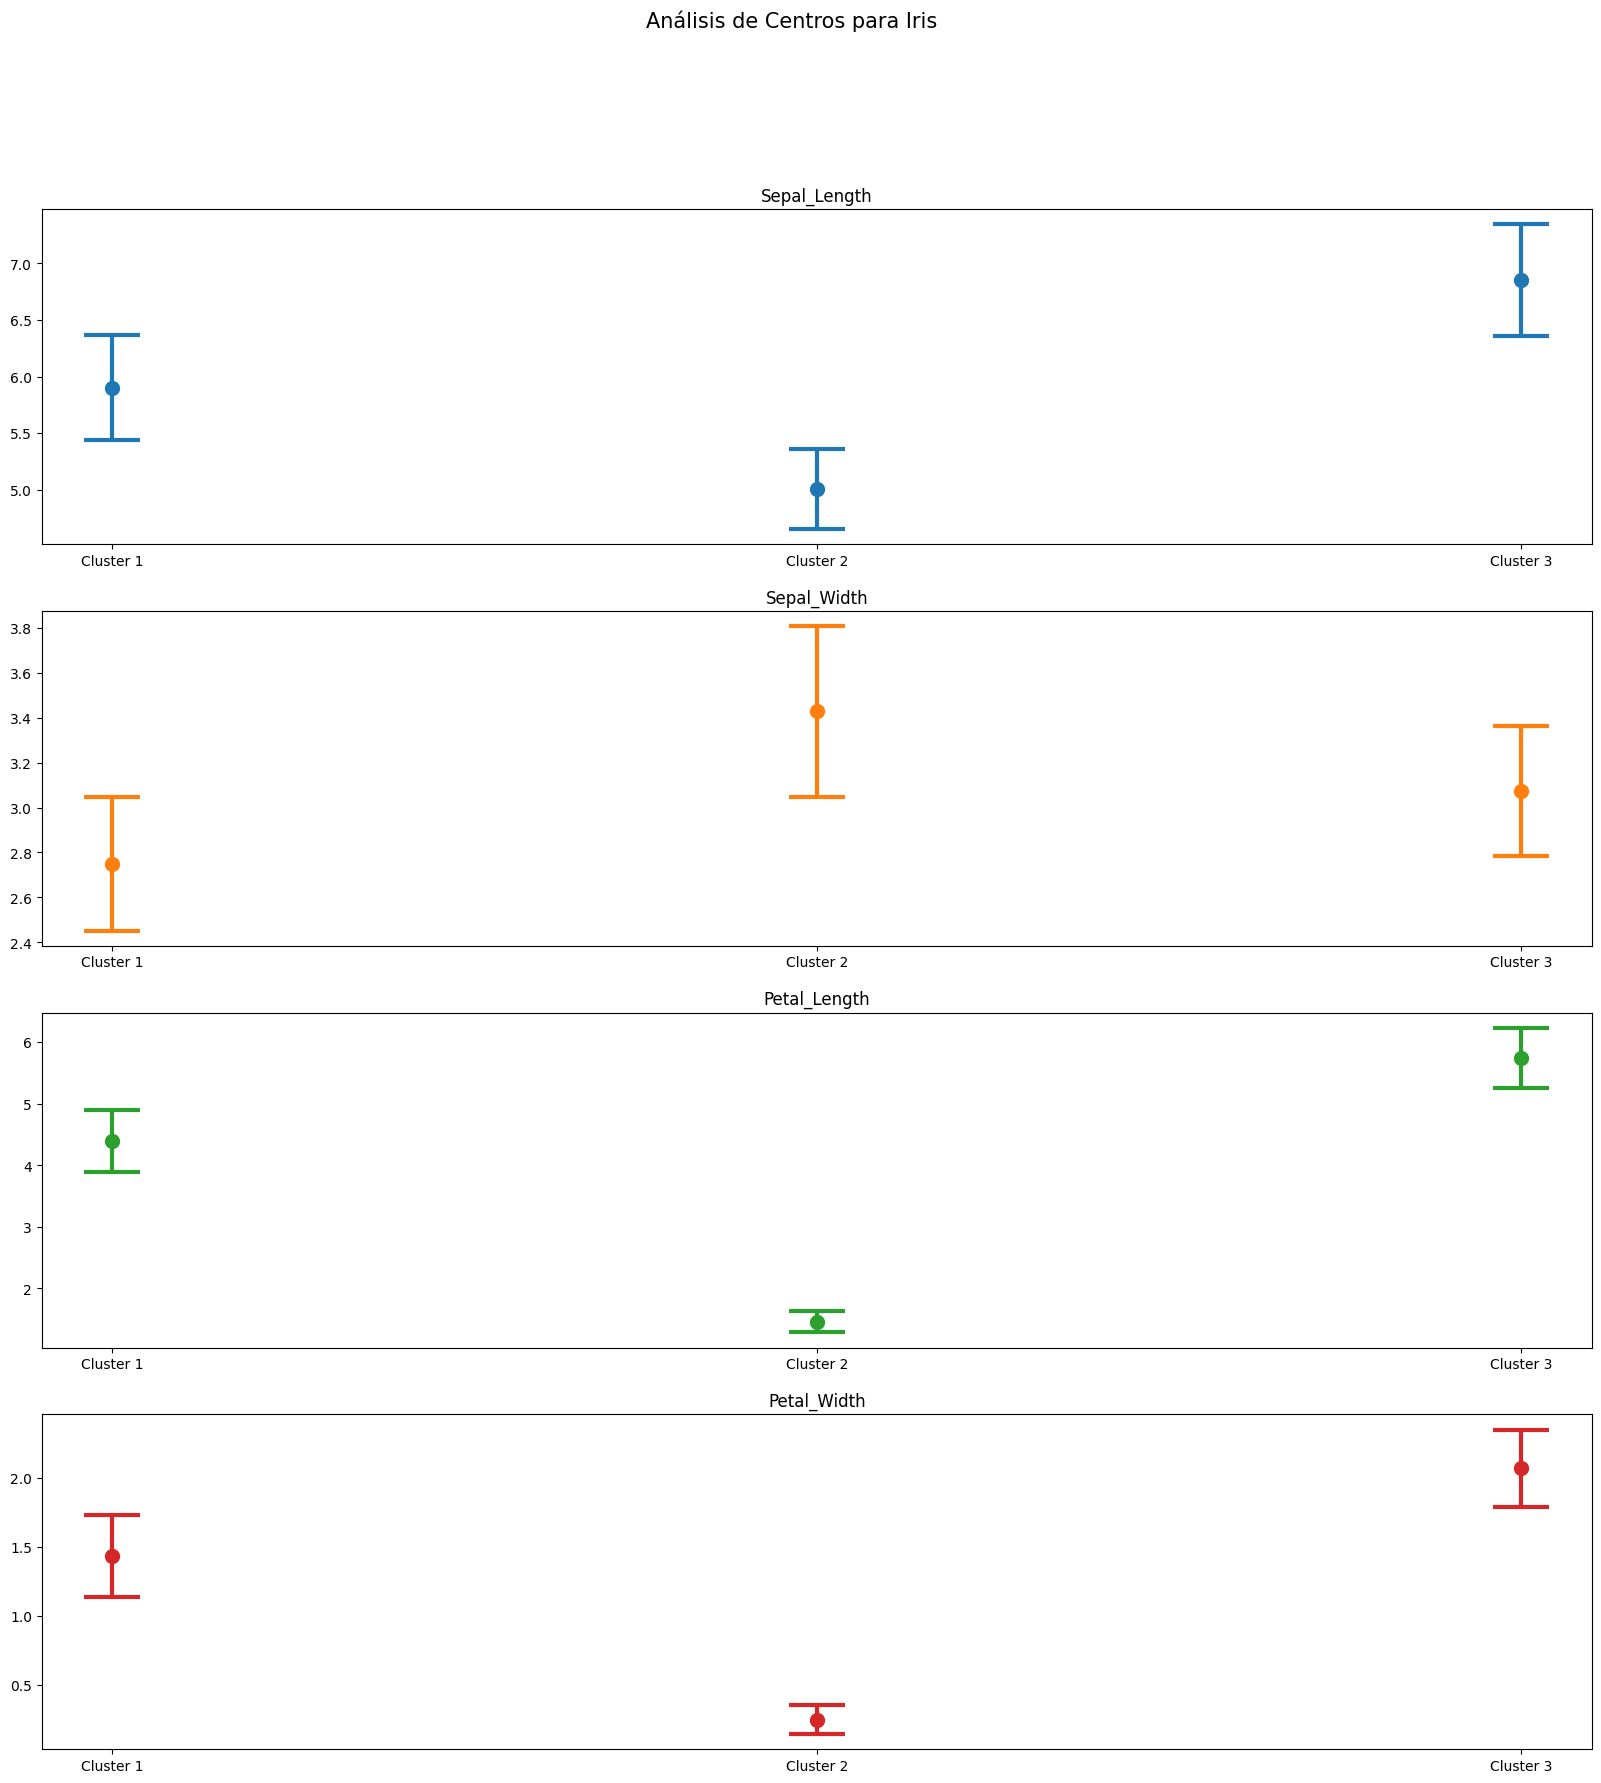

In [6]:
columns = df.drop(columns=["species", "labels"]).columns.tolist()
center_analysis_viz(
    df,
    n_clusters=3,
    labels=labels,
    columns=columns,
    title="Análisis de Centros para Iris",
)